## 6.10 Homework

The goal of this homework is to create a tree-based regression model for prediction apartment prices (column `'price'`).

In this homework we'll again use the New York City Airbnb Open Data dataset - the same one we used in homework 2 and 3.

You can take it from [Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)
or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv)
if you don't want to sign up to Kaggle.

Let's load the data:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
columns = [
    'neighbourhood_group', 'room_type', 'latitude', 'longitude',
    'minimum_nights', 'number_of_reviews','reviews_per_month',
    'calculated_host_listings_count', 'availability_365',
    'price'
]

df = pd.read_csv('AB_NYC_2019.csv.txt', usecols=columns)
df.reviews_per_month = df.reviews_per_month.fillna(0)

* Apply the log tranform to `price`
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1

In [5]:
df['logprice'] = np.log1p(df['price'])
list(df.columns)
#col_names = cols.remove()
#cols.remove('price')
#col_names = cols
#col_names

['neighbourhood_group',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'logprice']

In [6]:
del df['price']


In [7]:
col_names = list(df.columns)
col_names

['neighbourhood_group',
 'latitude',
 'longitude',
 'room_type',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'logprice']

In [8]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)#they use random state 42#does this matter
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
print(df_train)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train['logprice'].values
y_val = df_val['logprice'].values
y_test = df_test['logprice'].values

#del df_train['price']
#del df_val['price']
#del df_test['price']

      neighbourhood_group  latitude  longitude        room_type  \
385                Queens  40.76434  -73.92132  Entire home/apt   
33147            Brooklyn  40.73442  -73.95854     Private room   
33881            Brooklyn  40.66359  -73.99487  Entire home/apt   
37208            Brooklyn  40.63766  -74.02626     Private room   
7485             Brooklyn  40.65118  -74.00842     Private room   
...                   ...       ...        ...              ...   
2738             Brooklyn  40.69332  -73.96543  Entire home/apt   
25619           Manhattan  40.71856  -73.98753     Private room   
40278              Queens  40.69034  -73.84611     Private room   
17605           Manhattan  40.76324  -73.98459  Entire home/apt   
22406           Manhattan  40.74563  -73.97590  Entire home/apt   

       minimum_nights  number_of_reviews  reviews_per_month  \
385                 4                 30               0.32   
33147               5                  2               0.16   
33881 

Now, use `DictVectorizer` to turn train and validation into matrices:

In [10]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

#test_dict = df_test.to_dict(orient='records')
#X_test = dv.transform(test_dict)

## Question 1

Let's train a decision tree regressor to predict the price variable. 

* Train a model with `max_depth=1`

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

#train_dicts = df_train.fillna(0).to_dict(orient='records')

#dv = DictVectorizer(sparse=False)
#X_train = dv.fit_transform(train_dicts)

dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [12]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- logprice <= 4.77
|   |--- value: [4.22]
|--- logprice >  4.77
|   |--- value: [5.33]



Which feature is used for splitting the data?

* `room_type`
* `neighbourhood_group`
* `number_of_reviews`
* `reviews_per_month`

In [13]:
!pip install graphviz

In [21]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(dt, out_file=None, feature_names=df.get_feature_names()))

AttributeError: 'DataFrame' object has no attribute 'get_feature_names'

In [14]:
from sklearn.tree import export_graphviz
import IPython, graphviz, re, math

In [15]:
def draw_tree(t, col_names, size=9, ratio=0.5, precision=3):
    """ Draws a representation of a random forest in IPython.
    Parameters:
    -----------
    t: The tree you wish to draw
    df: The data used to train the tree. This is used to get the names of the features.
    """
    s=export_graphviz(t, out_file=None, feature_names=col_names, filled=True,
                      special_characters=True, rotate=True, precision=precision)
    IPython.display.display(graphviz.Source(re.sub('Tree {',
       f'Tree {{ size={size}; ratio={ratio}',s)))
col_names =col_names
draw_tree(dt, col_names, precision=3)

ValueError: Length of feature_names, 10 does not match number of features, 16

In [ ]:
from sklearn import tree
export_graphviz(dt,feature_names=dv.get_feature_names())

In [ ]:
print(export_graphviz(dt, feature_names=dv.get_feature_names()))

## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1`  (optional - to make training faster)

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

In [24]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [25]:
y_pred = rf.predict(X_val)
#roc_auc_score(y_val, y_pred)

In [26]:
from sklearn import metrics

In [27]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))  
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.00010588510591547746
Mean Squared Error: 3.7500936067682646e-06
Root Mean Squared Error: 0.9792676454700712


What's the RMSE of this model on validation?

* 0.059
* 0.259
* 0.459
* 0.659

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10
* Set `random_state` to `1`
* Evaluate the model on the validation dataset

In [28]:
scores = []


for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1,n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

    scores.append((n, rmse))

In [29]:
scores

[(10, 0.9792676454700712),
 (20, 0.979240617405868),
 (30, 0.9792378178630011),
 (40, 0.9792447038755807),
 (50, 0.9792324875461351),
 (60, 0.9792262182926313),
 (70, 0.9792222696233411),
 (80, 0.9791772346895838),
 (90, 0.9791855459847021),
 (100, 0.9791911497056156),
 (110, 0.9791979163708202),
 (120, 0.9791752109605888),
 (130, 0.9791831699829883),
 (140, 0.9791892201579075),
 (150, 0.9791862510107775),
 (160, 0.9791952965371628),
 (170, 0.979189717805101),
 (180, 0.9791941282008051),
 (190, 0.9791994781008186),
 (200, 0.9792002621007383)]

After which value of `n_estimators` does RMSE stop improving?

- 10
- 50
- 70
- 120##

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_state=1`

In [32]:
scores = []

for m in [10, 15, 20, 25]:
    rf = RandomForestRegressor( max_depth=m, random_state=1,n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

    scores.append((m, rmse))

In [33]:
scores #15?

[(10, 0.9791726006312869),
 (15, 0.9791927678643161),
 (20, 0.9791794614015384),
 (25, 0.9791874323541832)]

What's the best `max_depth`:

* 10
* 15
* 20
* 25

Bonus question (not graded):

Will the answer be different if we change the seed for the model?

## Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorith, it finds the best split. 
When doint it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the imporatant features 
for tree-based models.

In Scikit-Learn, tree-based models contain this information in the `feature_importances_` field. 

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)
* Get the feature importance information from this model

In [34]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
model= RandomForestRegressor( max_depth=m, random_state=1,n_jobs=-1)
model.fit(X_train, y_train)
#y_pred = rf.predict(X_val)
importance = model.feature_importances_

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00003
Feature: 2, Score: 0.00001
Feature: 3, Score: 0.99994
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000


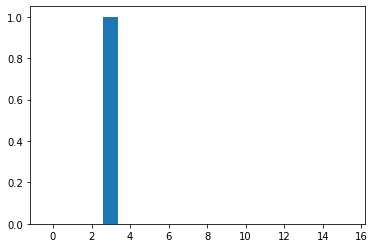

In [35]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

What's the most important feature? 

* `neighbourhood_group=Manhattan`
* `room_type=Entire home/apt`	##
* `longitude`
* `latitude`

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

In [36]:
!pip install xgboost
import xgboost as xgb

In [37]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [38]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [39]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [40]:
s = output.stdout

In [41]:
print(s[:100])

[0]	train-rmse:3.00827	val-rmse:3.00632
[5]	train-rmse:0.50685	val-rmse:0.50636
[10]	train-rmse:0.08


Now change `eta` first to `0.1` and then to `0.01`

In [42]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [43]:
s = output.stdout

In [44]:
print(s[:100])

[0]	train-rmse:3.86656	val-rmse:3.86375
[5]	train-rmse:2.28441	val-rmse:2.28265
[10]	train-rmse:1.34


In [45]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [46]:
s = output.stdout

In [47]:
print(s[:100])

[0]	train-rmse:4.25283	val-rmse:4.24962
[5]	train-rmse:4.04459	val-rmse:4.04156
[10]	train-rmse:3.84


What's the best eta?

* 0.3##
* 0.1
* 0.01

## Submit the results


Submit your results here: https://forms.gle/wQgFkYE6CtdDed4w8

It's possible that your answers won't match exactly. If it's the case, select the closest one.


## Deadline


The deadline for submitting is 20 October 2021, 17:00 CET (Wednesday). After that, the form will be closed.

